# KPMG Virtual Internship-Module 1 -Data Quality Assesment

## Importing libraries

PANDAS,NUMPY for data manuplation.

Matplotlib,seaborn module for Data Visualisation.

os for path setting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns 
import warnings

In [2]:
data_dir ='C:\\Users\\Keerthi\\Desktop\\04-Keerthi\\KPMG'
os.chdir(data_dir)

As the first column can be ignored, importing the data using pandas library from the second coulmn


In [3]:
transactions = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", header=1, sheet_name='Transactions',)
new_customer_lists = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", header=1, sheet_name='NewCustomerList')
customer_demographic = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", header=1, sheet_name='CustomerDemographic') 
customer_address = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", header=1, sheet_name='CustomerAddress')

In [4]:
print(' The shape of Transactions is ',transactions.shape)
print('Customer Transactions Information:-',transactions.info())

 The shape of Transactions is  (20000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB
Customer Transactions Information:- None


In [5]:
print(' The shape of Customer Demographics is ',customer_demographic.shape)
print('Customer Customer Demographics Information:-',customer_demographic.info()) 

 The shape of Customer Demographics is  (4000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object

In [6]:
print(' The shape of Customer Address is ',customer_address.shape)
print('Customer Customer Address Information:-',customer_address.info()) 

 The shape of Customer Address is  (3999, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null int64
address               3999 non-null object
postcode              3999 non-null int64
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int64
dtypes: int64(3), object(3)
memory usage: 187.5+ KB
Customer Customer Address Information:- None


In [7]:
print(' The shape of New Customer lists is ',new_customer_lists.shape)
print('Customer New Customer lists Information:-',new_customer_lists.info()) 

 The shape of New Customer lists is  (1000, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
count

### Observations:

    * Columns present in new_customer_lists are combination of Customer Demographic with the Customer Address but Customer Id is missing
    * Unnamed columns in new_customer_lists can be dropped

In [8]:
# Drop Unnamed Column
drop_col = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
new_customer_lists = new_customer_lists.drop(drop_col, axis=1)

# Merging Customer data

In [9]:
set(customer_demographic.customer_id).symmetric_difference(customer_address.customer_id)


{3, 10, 22, 23, 4001, 4002, 4003}

###### We need to merge the Customer Demographic with the Customer Address table before joining with New Customer List

In [10]:
demographic = pd.merge(customer_demographic, customer_address, how='left', on='customer_id')


In [11]:
demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


In [12]:
demographic['default'].value_counts()

100                                                                                                                                                                                                                   113
1                                                                                                                                                                                                                     112
-1                                                                                                                                                                                                                    111
-100                                                                                                                                                                                                                   99
â°â´âµâââ                                                                                                                       

#### 'default' Column doesn't provide any additional information, So dropping the column

In [13]:
drop_col=['default']
demographic = demographic.drop(drop_col, axis=1)

### Comparing First and Last Names in two tables to find reapetitive customer information

In [14]:
Df= demographic[['first_name','last_name']].isin(new_customer_lists[['first_name','last_name']])

In [15]:
Df.loc[(Df["first_name"] == True) & (Df["last_name"] == True)]

,first_name,last_name


* Observations :
        * The customers present in customer_demographic and new_customer_lists are entirely different. 
        * Adding Customer_id with serial number starting from 4004, As 4003 was the last customer_id which is used in                        customer_demographic
        

### Adding customer_id to new_customer_lists

In [16]:
new_customer_lists.insert(0, 'customer_id', range(4004, 4004 + len(new_customer_lists)))

In [17]:
new_customer_lists.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,4004,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,4005,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,4006,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,4007,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,4008,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


### Concatinating datas of customer data into one 

In [18]:
customer = pd.concat([new_customer_lists, demographic])
#customer = customer.reset_index(drop=True)
customer.head()

C:\Users\Keerthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,DOB,Rank,Value,address,country,customer_id,deceased_indicator,first_name,gender,job_industry_category,job_title,last_name,owns_car,past_3_years_bike_related_purchases,postcode,property_valuation,state,tenure,wealth_segment
0,1957-07-12,1.0,1.718750,45 Shopko Center,Australia,4004,N,Chickie,Male,Manufacturing,General Manager,Brister,Yes,86,4500.0,6.0,QLD,14.0,Mass Customer
1,1970-03-22,1.0,1.718750,14 Mccormick Park,Australia,4005,N,Morly,Male,Property,Structural Engineer,Genery,No,69,2113.0,11.0,NSW,16.0,Mass Customer
2,1974-08-28,1.0,1.718750,5 Colorado Crossing,Australia,4006,N,Ardelis,Female,Financial Services,Senior Cost Accountant,Forrester,No,10,3505.0,5.0,VIC,10.0,Affluent Customer
3,1979-01-28,4.0,1.703125,207 Annamark Plaza,Australia,4007,N,Lucine,Female,Manufacturing,Account Representative III,Stutt,Yes,64,4814.0,1.0,QLD,5.0,Affluent Customer
4,1965-09-21,4.0,1.703125,115 Montana Place,Australia,4008,N,Melinda,Female,Financial Services,Financial Analyst,Hadlee,No,34,2093.0,9.0,NSW,19.0,Affluent Customer


In [19]:
print('shape of data -->',customer.shape)

shape of data --> (5000, 19)


In [20]:
print('\nColumns of Customer data\n -->',customer.columns)


Columns of Customer data
 --> Index(['DOB', 'Rank', 'Value', 'address', 'country', 'customer_id',
       'deceased_indicator', 'first_name', 'gender', 'job_industry_category',
       'job_title', 'last_name', 'owns_car',
       'past_3_years_bike_related_purchases', 'postcode', 'property_valuation',
       'state', 'tenure', 'wealth_segment'],
      dtype='object')


In [21]:
customer.dtypes

DOB                                    datetime64[ns]
Rank                                          float64
Value                                         float64
address                                        object
country                                        object
customer_id                                     int64
deceased_indicator                             object
first_name                                     object
gender                                         object
job_industry_category                          object
job_title                                      object
last_name                                      object
owns_car                                       object
past_3_years_bike_related_purchases             int64
postcode                                      float64
property_valuation                            float64
state                                          object
tenure                                        float64
wealth_segment              

## Data preprocessing - Customer Data

For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.

    We will have to check for the following
        (i) Missing values analysis
        (ii) Outliers analysis
        (iii) Columns Analysis

### a) Missing Values 

In [22]:
print(customer.isnull().sum())

DOB                                     104
Rank                                   4000
Value                                  4000
address                                   4
country                                   4
customer_id                               0
deceased_indicator                        0
first_name                                0
gender                                    0
job_industry_category                   821
job_title                               612
last_name                               154
owns_car                                  0
past_3_years_bike_related_purchases       0
postcode                                  4
property_valuation                        4
state                                     4
tenure                                   87
wealth_segment                            0
dtype: int64


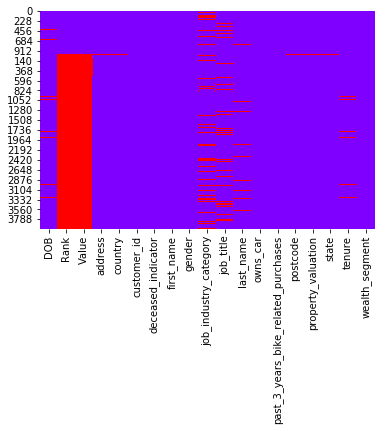

In [23]:
sns.heatmap(customer.isnull(), cbar=False,cmap='rainbow')

Observations :
        * DOB will be converted to age and handled.
        * Rank, Value columns can be dropped
        * Update last_name,Job_title and job_industry_category with 'unknown'
        * Drop rows with NA values for address , country
        * Update tenure with mean value.

#### Drop Rank, Value 

In [24]:
drop_col=['Rank','Value']
customer = customer.drop(drop_col, axis=1)

#### Update Null values of job_title,job_industry_category,last_name with Unknown

In [25]:

customer['job_title'].fillna('Unknown', inplace=True)
customer['job_industry_category'].fillna('Unknown', inplace=True)
customer['last_name'].fillna('Unknown', inplace=True)

#### Update Null values of Tenure with mean

Check

In [26]:
# tenure 
customer['tenure'].fillna((customer['tenure'].mean()), inplace=True)

### Converting DOB to Age

In [27]:
def age(date):
    age=(pd.to_datetime('today').year-pd.to_datetime(date).year)
    return age
customer['age'] = customer['DOB'].apply(age)
customer= customer.drop('DOB',axis=1)

In [28]:
# Filling Null values with mode 
customer['age'].fillna((customer['age'].mode()[0]), inplace=True)

In [29]:
customer.loc[(customer["age"] == 177)]

,address,country,customer_id,deceased_indicator,first_name,gender,job_industry_category,job_title,last_name,owns_car,past_3_years_bike_related_purchases,postcode,property_valuation,state,tenure,wealth_segment,age
33,833 Luster Way,Australia,34,N,Jephthah,U,IT,Legal Assistant,Bachmann,No,59,4005.0,8.0,QLD,20.0,Affluent Customer,177.0


We can observe one data which is outlier with 177 years old, this row will be dropped.

In [30]:
customer = customer[customer.age != 177]

### Drop rows with null values

In [31]:
print('Number of rows in Customer -->',customer.shape)


Number of rows in Customer --> (4999, 17)


In [32]:
customer['gender'].value_counts()

Female    2550
Male      2342
U          104
F            1
M            1
Femal        1
Name: gender, dtype: int64

In [33]:
customer=customer.dropna()

### Checking for Null values 

In [34]:
print(customer.isnull().sum())

address                                0
country                                0
customer_id                            0
deceased_indicator                     0
first_name                             0
gender                                 0
job_industry_category                  0
job_title                              0
last_name                              0
owns_car                               0
past_3_years_bike_related_purchases    0
postcode                               0
property_valuation                     0
state                                  0
tenure                                 0
wealth_segment                         0
age                                    0
dtype: int64


### b) Outliers 

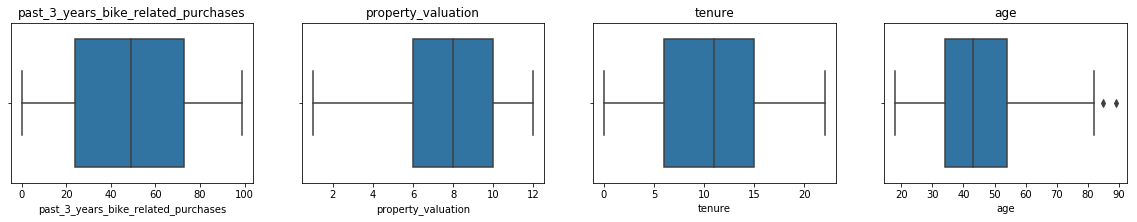

In [35]:
plt.figure(figsize=(20, 10))
X=customer
col = ['past_3_years_bike_related_purchases','property_valuation','tenure','age']
# i: index
for i, col in enumerate(X[col]):
    plt.subplot(3, 4, i+1)
    x = customer[col]
    sns.boxplot(x)
    plt.title(col)

### Exploring for duplicate

In [36]:
customer[customer.duplicated()].sum()

address                                0.0
country                                0.0
customer_id                            0.0
deceased_indicator                     0.0
first_name                             0.0
gender                                 0.0
job_industry_category                  0.0
job_title                              0.0
last_name                              0.0
owns_car                               0.0
past_3_years_bike_related_purchases    0.0
postcode                               0.0
property_valuation                     0.0
state                                  0.0
tenure                                 0.0
wealth_segment                         0.0
age                                    0.0
dtype: float64

### Summary Statistics


summary statistics can be created for pandas dataframe using describe method

In [37]:
print(customer.describe())

       customer_id  past_3_years_bike_related_purchases     postcode  \
count  4995.000000                          4995.000000  4995.000000   
mean   2503.585185                            49.070070  2992.236436   
std    1442.935577                            28.543636   845.722110   
min       1.000000                             0.000000  2000.000000   
25%    1254.500000                            24.000000  2203.000000   
50%    2503.000000                            49.000000  2768.000000   
75%    3751.500000                            73.000000  3784.000000   
max    5003.000000                            99.000000  4883.000000   

       property_valuation       tenure          age  
count         4995.000000  4995.000000  4995.000000  
mean             7.490490    10.803225    44.147948  
std              2.812606     5.495472    13.712972  
min              1.000000     0.000000    18.000000  
25%              6.000000     6.000000    34.000000  
50%              8.000000  

### Exploring Columns

#### Age

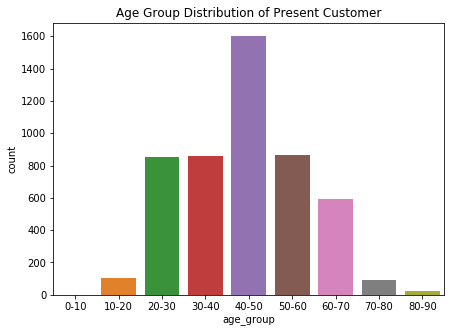

In [38]:
customer['age_group'] = pd.cut(x=customer['age'], bins=[0,10,20,30,40,50,60,70,80,90], labels=['0-10','10-20','20-30',\
                                                            '30-40','40-50','50-60','60-70','70-80','80-90'], right=True)
fig,ax=plt.subplots(figsize=(7,5))
sns.countplot(x ='age_group',data=customer)
plt.title('Age Group Distribution of Present Customer')
plt.show()

### State

In [39]:
customer ['state'].value_counts()

NSW                2558
VIC                1205
QLD                1064
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [40]:
customer['state'].replace({'New South Wales': 'NSW', 'Victoria':'VIC'}, inplace=True)
customer ['state'].value_counts()

NSW    2644
VIC    1287
QLD    1064
Name: state, dtype: int64

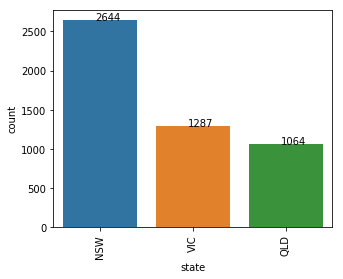

In [41]:
plt.figure(figsize=(5,4))
ax=sns.countplot("state", data = customer,order = customer['state'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
plt.show()

### Country

In [42]:
customer['country'].value_counts()

Australia    4995
Name: country, dtype: int64

### Deceased 

In [43]:
customer['deceased_indicator'].value_counts()


N    4993
Y       2
Name: deceased_indicator, dtype: int64

As we have 2 rows in Y category , It doesnt provide much insight. Dropping the column

In [44]:
customer.drop(columns=['deceased_indicator'], inplace = True)


### Gender

In [45]:
customer['gender'].value_counts()

Female    2548
Male      2340
U          104
F            1
M            1
Femal        1
Name: gender, dtype: int64

In [46]:
customer['gender'].replace({'M': 'Male', 'Femal':'Female','F':"Female",'U':"Unknown"}, inplace=True)


In [47]:
customer['gender'].value_counts()

Female     2550
Male       2341
Unknown     104
Name: gender, dtype: int64

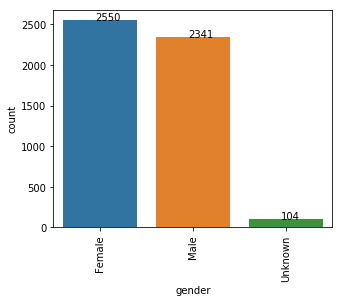

In [48]:
plt.figure(figsize=(5,4))
ax=sns.countplot("gender", data = customer,order = customer['gender'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
plt.show()

### Job Industry Category

In [49]:
customer['job_industry_category'].value_counts()

Manufacturing         998
Financial Services    976
Unknown               820
Health                754
Retail                436
Property              330
IT                    272
Entertainment         173
Argiculture           139
Telecommunications     97
Name: job_industry_category, dtype: int64

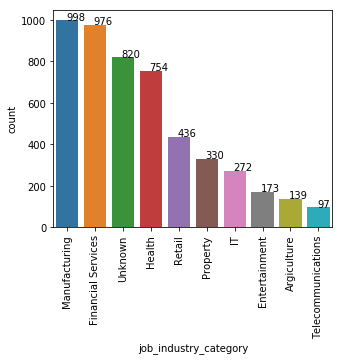

In [50]:
plt.figure(figsize=(5,4))
ax=sns.countplot("job_industry_category", data = customer,order = customer['job_industry_category'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
plt.show()

### Job Title

In [51]:
customer['job_title'].value_counts()

Unknown                                 610
Business Systems Development Analyst     55
Social Worker                            55
Associate Professor                      54
Junior Executive                         49
Tax Accountant                           49
Recruiting Manager                       49
General Manager                          49
Structural Engineer                      49
Internal Auditor                         48
Cost Accountant                          48
Legal Assistant                          48
Dental Hygienist                         47
Chemical Engineer                        47
Sales Representative                     46
Product Engineer                         46
Executive Secretary                      45
Desktop Support Technician               45
Assistant Media Planner                  45
Account Executive                        44
VP Quality Control                       44
Technical Writer                         44
VP Sales                        

### Own Car

In [52]:
customer['owns_car'].value_counts()

Yes    2514
No     2481
Name: owns_car, dtype: int64

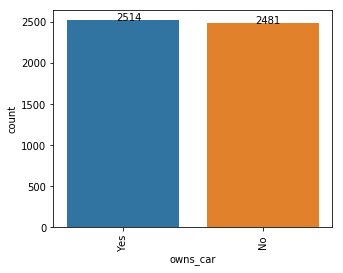

In [53]:
plt.figure(figsize=(5,4))
ax=sns.countplot("owns_car", data = customer,order = customer['owns_car'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
plt.show()

### Wealth Segment

In [54]:
customer['wealth_segment'].value_counts()

Mass Customer        2505
High Net Worth       1271
Affluent Customer    1219
Name: wealth_segment, dtype: int64

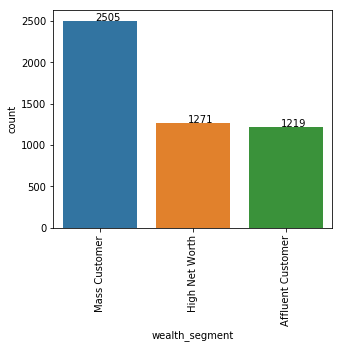

In [55]:
plt.figure(figsize=(5,4))
ax=sns.countplot("wealth_segment", data = customer,order = customer['wealth_segment'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
plt.show()

### Correlation Matrix

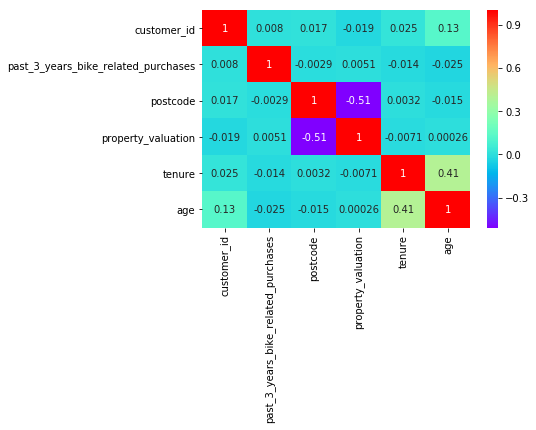

In [56]:
customer_cor = customer.corr()
sns.heatmap(customer_cor, annot=True,cmap='rainbow')

We can observe that Property_valuation and Postcode are in negative correlation

Tenure and age are in postive correlation

## Data preprocessing - Transactions Data


In [57]:
print(' The shape of column is ',transactions.shape)
transactions.info()

 The shape of column is  (20000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [58]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0



For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.

    We will have to check for the following
        (i) Missing values analysis
        (ii) Outliers analysis
        (iii) Columns Analysis

### a)Missing Values


In [59]:
transactions.isnull().sum()


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

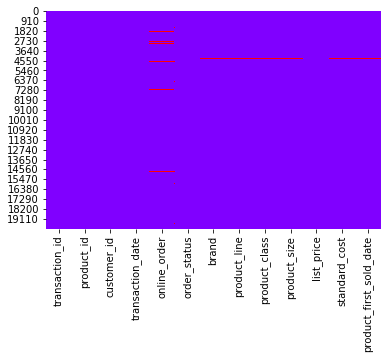

In [60]:
sns.heatmap(transactions.isnull(), cbar=False,cmap='rainbow')

### Observations:

online_order               360
brand                      197
product_line               197
product_class              197
product_size               197
standard_cost              197
product_first_sold_date    197    ,

### Null value Analysis 

#### Droping Null values in     online_order,    standard_cost,    product_first_sold_date

In [61]:
transactions.dropna(subset= ['online_order'], inplace = True) 
transactions.dropna(subset= ['standard_cost'], inplace = True) 
transactions.dropna(subset= ['product_first_sold_date'], inplace = True) 

#### Assigning Null values of     brand,    product_line,    product_size with Unknown

In [62]:
transactions['brand'].fillna(value = 'Unknown', inplace = True)
transactions['product_line'].fillna(value = 'Unknown', inplace = True)
transactions['product_size'].fillna(value = 'Unknown', inplace = True)

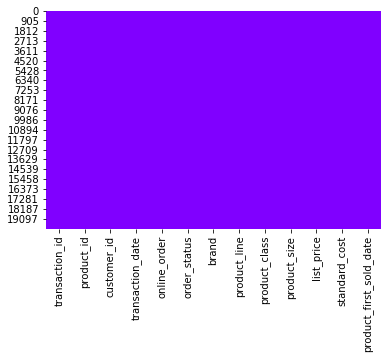

In [63]:
sns.heatmap(transactions.isnull(), cbar=False,cmap='rainbow')

### Outliers 

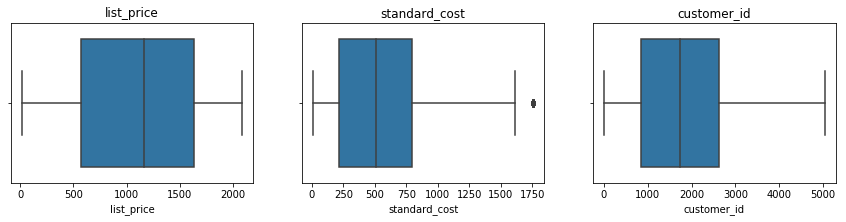

In [64]:
plt.figure(figsize=(20, 10))
X=transactions
col = ['list_price','standard_cost','customer_id']
# i: index
for i, col in enumerate(X[col]):
    plt.subplot(3, 4, i+1)
    x = transactions[col]
    sns.boxplot(x)
    plt.title(col)


### Exploring Duplicate Values

In [65]:
transactions[transactions.duplicated()].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

### Summary Statistics


summary statistics can be created for pandas dataframe using describe method 

In [66]:
print(transactions.describe())


       transaction_id    product_id   customer_id  online_order    list_price  \
count    19445.000000  19445.000000  19445.000000  19445.000000  19445.000000   
mean      9989.257393     45.797737   1739.467267      0.500849   1107.337193   
std       5779.669087     30.571996   1011.889153      0.500012    582.662400   
min          1.000000      0.000000      1.000000      0.000000     12.010000   
25%       4976.000000     18.000000    857.000000      0.000000    575.270000   
50%       9985.000000     45.000000   1741.000000      1.000000   1163.890000   
75%      14997.000000     72.000000   2615.000000      1.000000   1635.300000   
max      20000.000000    100.000000   5034.000000      1.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19445.000000             19445.000000  
mean      555.585260             38201.758653  
std       405.596541              2878.067854  
min         7.210000             33259.000000  
25%       215.140000          

We can observe that customer_id has a outlier value '5034'

### Exploring Columns

In [67]:
transactions['customer_id'].max()

5034

We can see that Customer_id doesnt existis so this row will be dropped

In [68]:
transactions = transactions[transactions.customer_id != 5034]

In [69]:
transactions['order_status'].value_counts()

Approved     19270
Cancelled      172
Name: order_status, dtype: int64

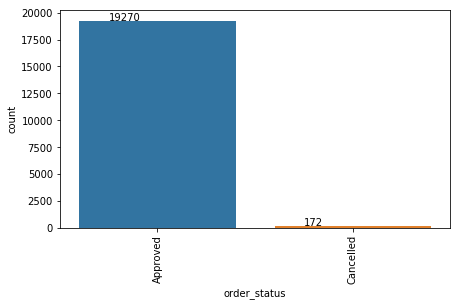

In [70]:
plt.figure(figsize=(7,4))
ax=sns.countplot("order_status", data = transactions,order = transactions['order_status'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [71]:
transactions['brand'].value_counts()

Solex             4168
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2992
Trek Bicycles     2931
Norco Bicycles    2862
Name: brand, dtype: int64

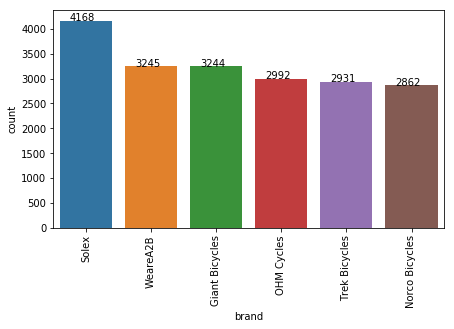

In [72]:
plt.figure(figsize=(7,4))
ax=sns.countplot("brand", data = transactions,order = transactions['brand'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [73]:
transactions['product_line'].value_counts()

Standard    13919
Road         3892
Touring      1213
Mountain      418
Name: product_line, dtype: int64

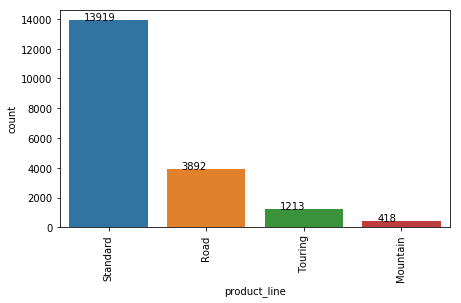

In [74]:
plt.figure(figsize=(7,4))
ax=sns.countplot("product_line", data = transactions,order = transactions['product_line'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [75]:
transactions['product_class'].value_counts()

medium    13584
high       2952
low        2906
Name: product_class, dtype: int64

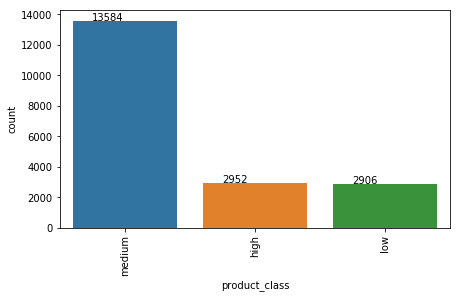

In [76]:
plt.figure(figsize=(7,4))
ax=sns.countplot("product_class", data = transactions,order = transactions['product_class'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [77]:
transactions['product_size'].value_counts()

medium    12764
large      3900
small      2778
Name: product_size, dtype: int64

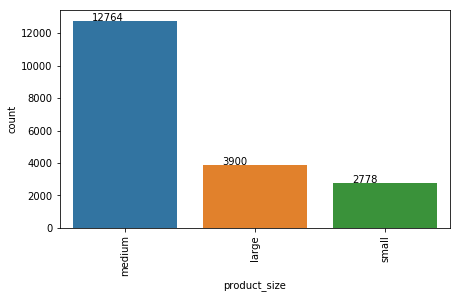

In [78]:
plt.figure(figsize=(7,4))
ax=sns.countplot("product_size", data = transactions,order = transactions['product_size'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

#### Converting product_first_sold_date to date

In [79]:
transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'], unit='s')
transactions['product_first_sold_date'].head()

C:\Users\Keerthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

### Correlation Matrix

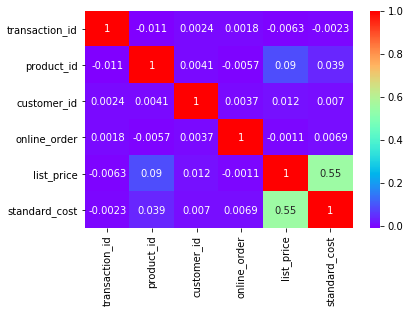

In [82]:
transactions_corr = transactions.corr()
sns.heatmap(transactions_corr, annot=True,cmap='rainbow')

We can observe that list_price and standard cost are in postive correlaion. They can be used in calculating profit